**EDA on Streaming OULAD**

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ouladstr.csv')

We next merge all data rows correspond to each (student, module, presentation).

In [4]:
dfs = df.drop(['dataplus','date','score'], axis=1)
student_feats = ['gender','region','highest_education','imd_band','age_band',
                 'num_of_prev_attempts','disability','studied_credits','final_result']
tag = ['id_student','code_module','code_presentation']
X1 = dfs.drop(student_feats,axis=1).groupby(tag).sum()
X2y = dfs[tag+student_feats].groupby(tag).mean()
dfc = pd.concat([X1,X2y],axis=1)

We have previously identified features tied to each unique student. Next we identify the interaction features.

In [5]:
interact_feats = list(df.columns[13:-2])
interact_feats

['dualpane',
 'externalquiz',
 'folder',
 'forumng',
 'glossary',
 'homepage',
 'htmlactivity',
 'oucollaborate',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'questionnaire',
 'quiz',
 'repeatactivity',
 'resource',
 'sharedsubpage',
 'subpage',
 'url']

**Correlations**

We next look at correlations between the interaction features, and then between the student features, and then between both sets of these.

,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
dualpane,1.000000,-0.063711,0.277795,0.166344,-0.007104,0.309164,0.010325,0.021025,0.518772,0.245939,0.194453,0.523307,0.559241,0.268406,0.054947,0.058421,-0.014368,0.370600,0.230289
externalquiz,-0.063711,1.000000,-0.054807,0.117913,0.143077,0.244016,-0.055072,0.301327,-0.067700,0.201289,0.213265,-0.068145,-0.078164,-0.129782,-0.002530,0.209209,-0.014564,0.402280,0.352577
folder,0.277795,-0.054807,1.000000,0.084475,-0.006715,0.195242,-0.046738,0.050770,0.351322,-0.036176,0.008953,0.393498,0.300689,0.314380,0.005149,0.043170,-0.012360,0.308735,0.095774
forumng,0.166344,0.117913,0.084475,1.000000,0.053276,0.737192,0.083147,0.207212,0.261656,0.116459,0.214977,0.183242,0.206056,0.189367,0.011006,0.177076,0.098426,0.375550,0.404031
glossary,-0.007104,0.143077,-0.006715,0.053276,1.000000,0.091269,-0.011669,0.090139,-0.002620,0.023932,0.049369,-0.011327,-0.003930,-0.027192,-0.000363,0.078753,0.000154,0.151127,0.132092
homepage,0.309164,0.244016,0.195242,0.737192,0.091269,1.000000,0.171484,0.287351,0.555706,0.229211,0.322141,0.381133,0.412228,0.401823,0.019653,0.292268,0.044241,0.682273,0.610523
htmlactivity,0.010325,-0.055072,-0.046738,0.083147,-0.011669,0.171484,1.000000,0.095456,0.309361,-0.036351,0.008305,0.144624,0.304222,0.221409,-0.000608,0.008098,-0.012420,0.254995,0.090751
oucollaborate,0.021025,0.301327,0.050770,0.207212,0.090139,0.287351,0.095456,1.000000,0.141171,-0.056081,0.105488,0.044707,0.092693,0.078818,0.003927,0.203773,-0.014846,0.323239,0.193159
oucontent,0.518772,-0.067700,0.351322,0.261656,-0.002620,0.555706,0.309361,0.141171,1.000000,0.194942,0.266158,0.628585,0.714356,0.482083,0.015520,0.129610,-0.030819,0.605069,0.352727
ouelluminate,0.245939,0.201289,-0.036176,0.116459,0.023932,0.229211,-0.036351,-0.056081,0.194942,1.000000,0.097864,0.272032,0.219865,0.119613,-0.001670,0.087434,-0.001436,0.309847,0.264952


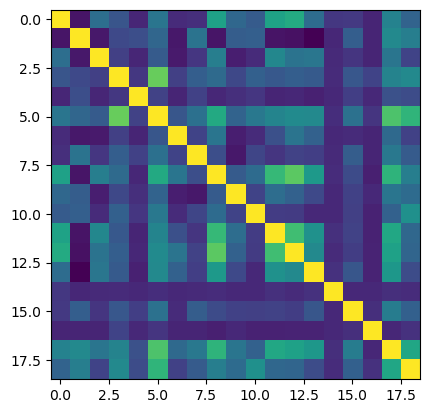

In [6]:
plt.imshow(dfc[interact_feats].corr())
dfc[interact_feats].corr()

`homepage` appears correlated with quite a few things (not a surprise and maybe not informative), as do `subpage` and `url` (which also seem pretty generic and maybe not informative) ... in general I'm not sure how to read any of these correlations, other than that `homepage` should maybe be read as a sort of "total interaction" feature and is maybe redundant if we include `subpage` and/or `url`.

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,disability,studied_credits,final_result
gender,1.000000,0.012644,-0.067283,-0.076905,0.032714,0.025170,0.043220,-0.028086,0.049740
region,0.012644,1.000000,-0.066701,-0.127836,-0.015063,0.009064,-0.047444,0.026012,-0.018522
highest_education,-0.067283,-0.066701,1.000000,0.126581,0.101349,-0.041039,-0.079344,0.017732,0.140170
imd_band,-0.076905,-0.127836,0.126581,1.000000,0.071631,-0.043058,-0.064836,-0.037520,0.117180
age_band,0.032714,-0.015063,0.101349,0.071631,1.000000,0.005903,-0.023550,-0.076273,0.068006
num_of_prev_attempts,0.025170,0.009064,-0.041039,-0.043058,0.005903,1.000000,0.056532,0.180541,-0.090634
disability,0.043220,-0.047444,-0.079344,-0.064836,-0.023550,0.056532,1.000000,0.052341,-0.068242
studied_credits,-0.028086,0.026012,0.017732,-0.037520,-0.076273,0.180541,0.052341,1.000000,-0.147055
final_result,0.049740,-0.018522,0.140170,0.117180,0.068006,-0.090634,-0.068242,-0.147055,1.000000


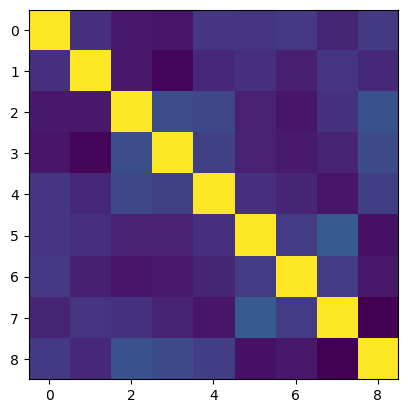

In [7]:
plt.imshow(dfc[student_feats].corr())
dfc[student_feats].corr()

Not much correlation here.

,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,...,url,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,disability,studied_credits,final_result
dualpane,1.000000,-0.063711,0.277795,0.166344,-0.007104,0.309164,0.010325,0.021025,0.518772,0.245939,...,0.230289,-0.135707,-0.009101,0.025540,0.033753,0.041552,-0.033123,-0.019857,-0.004791,0.151616
externalquiz,-0.063711,1.000000,-0.054807,0.117913,0.143077,0.244016,-0.055072,0.301327,-0.067700,0.201289,...,0.352577,0.002207,-0.018420,0.048169,0.043599,0.032642,0.011682,0.008813,0.005628,0.098264
folder,0.277795,-0.054807,1.000000,0.084475,-0.006715,0.195242,-0.046738,0.050770,0.351322,-0.036176,...,0.095774,-0.111573,0.013665,0.014228,0.013267,-0.018719,-0.009143,-0.017074,0.044274,0.143381
forumng,0.166344,0.117913,0.084475,1.000000,0.053276,0.737192,0.083147,0.207212,0.261656,0.116459,...,0.404031,0.035840,-0.023016,0.046524,0.053541,0.149996,-0.039113,-0.017306,-0.010263,0.277218
glossary,-0.007104,0.143077,-0.006715,0.053276,1.000000,0.091269,-0.011669,0.090139,-0.002620,0.023932,...,0.132092,0.025239,0.002481,0.011691,0.011400,0.023612,-0.005031,0.007784,-0.009322,0.051210
homepage,0.309164,0.244016,0.195242,0.737192,0.091269,1.000000,0.171484,0.287351,0.555706,0.229211,...,0.610523,-0.062653,-0.018915,0.079583,0.071032,0.148021,-0.058469,-0.019951,0.004747,0.396959
htmlactivity,0.010325,-0.055072,-0.046738,0.083147,-0.011669,0.171484,1.000000,0.095456,0.309361,-0.036351,...,0.090751,-0.106698,0.007405,-0.015373,-0.003152,0.015869,-0.023082,0.006248,0.054834,0.040853
oucollaborate,0.021025,0.301327,0.050770,0.207212,0.090139,0.287351,0.095456,1.000000,0.141171,-0.056081,...,0.193159,-0.015796,0.006556,0.046632,0.037600,0.076995,-0.013328,0.002751,-0.005028,0.179911
oucontent,0.518772,-0.067700,0.351322,0.261656,-0.002620,0.555706,0.309361,0.141171,1.000000,0.194942,...,0.352727,-0.168069,-0.006293,0.047062,0.053659,0.083546,-0.055849,-0.038139,-0.019585,0.341305
ouelluminate,0.245939,0.201289,-0.036176,0.116459,0.023932,0.229211,-0.036351,-0.056081,0.194942,1.000000,...,0.264952,-0.037712,0.017158,0.011364,0.017541,0.036009,0.013749,0.005472,0.015277,0.062969


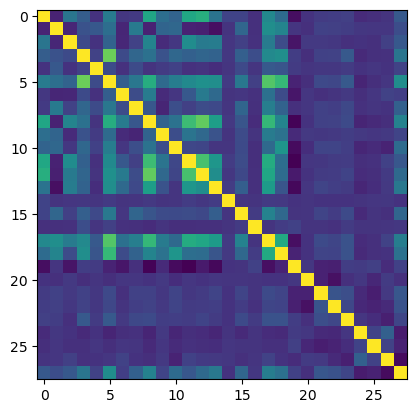

In [8]:
plt.imshow(dfc.corr())
dfc.corr()

**Distribution of features**

We next look at the distribution of features.

In [9]:
len(student_feats), len(interact_feats)

(9, 19)

IndexError: index 2 is out of bounds for axis 0 with size 2

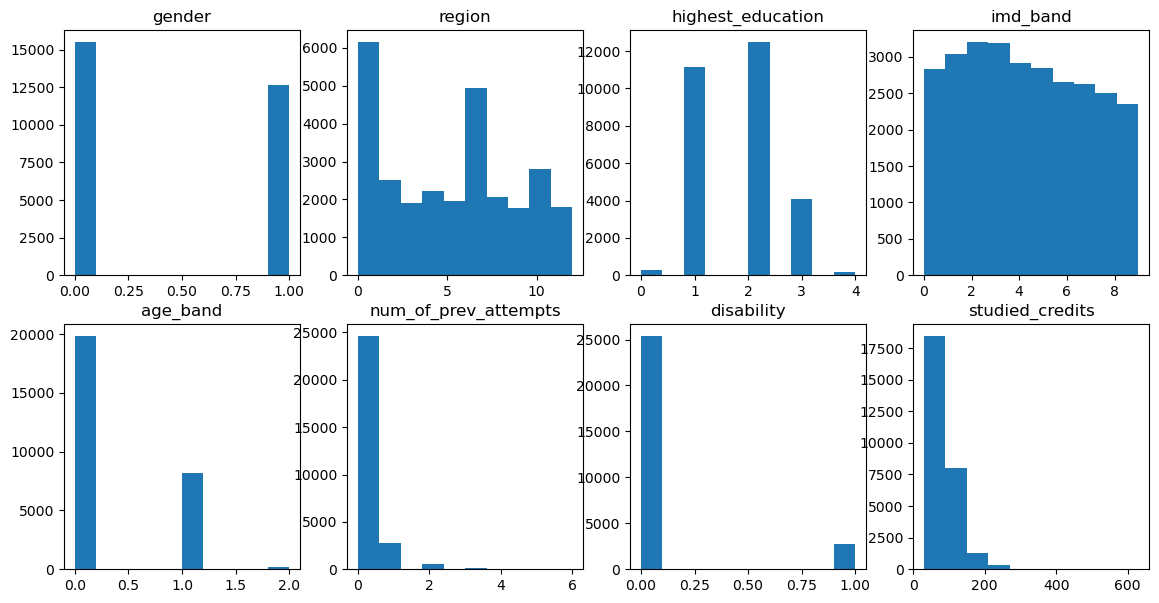

In [10]:
fig, axs = plt.subplots(nrows=2,ncols=4, figsize=(14,7))

for idx, feature in enumerate(dfc[student_feats]): 
    y, x = idx//4, idx%4
    axs[y, x].hist(dfc[feature])
    axs[y, x].set_title(feature)

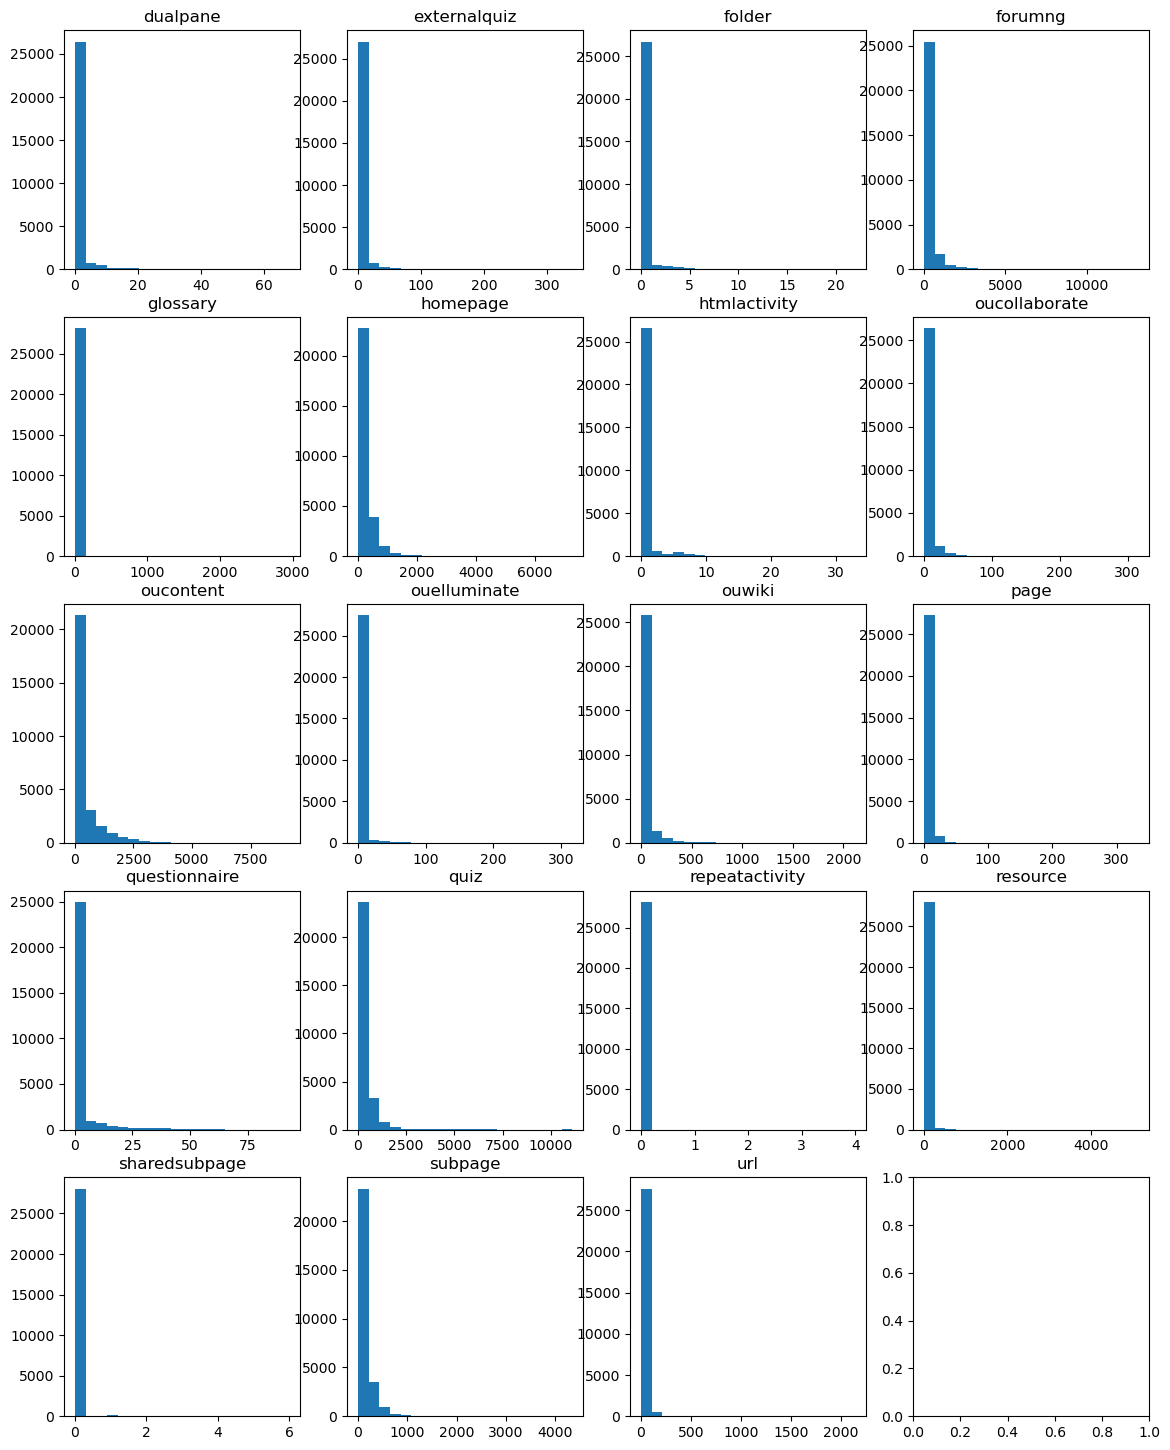

In [ ]:
fig, axs = plt.subplots(nrows=5,ncols=4, figsize=(14,18))

for idx, feature in enumerate(dfc[interact_feats]): 
    y, x = idx//4, idx%4
    axs[y, x].hist(dfc[feature], bins=20)
    axs[y, x].set_title(feature)

It may be that (even after aggregation) there are lots of zero values. Let's see how many ...

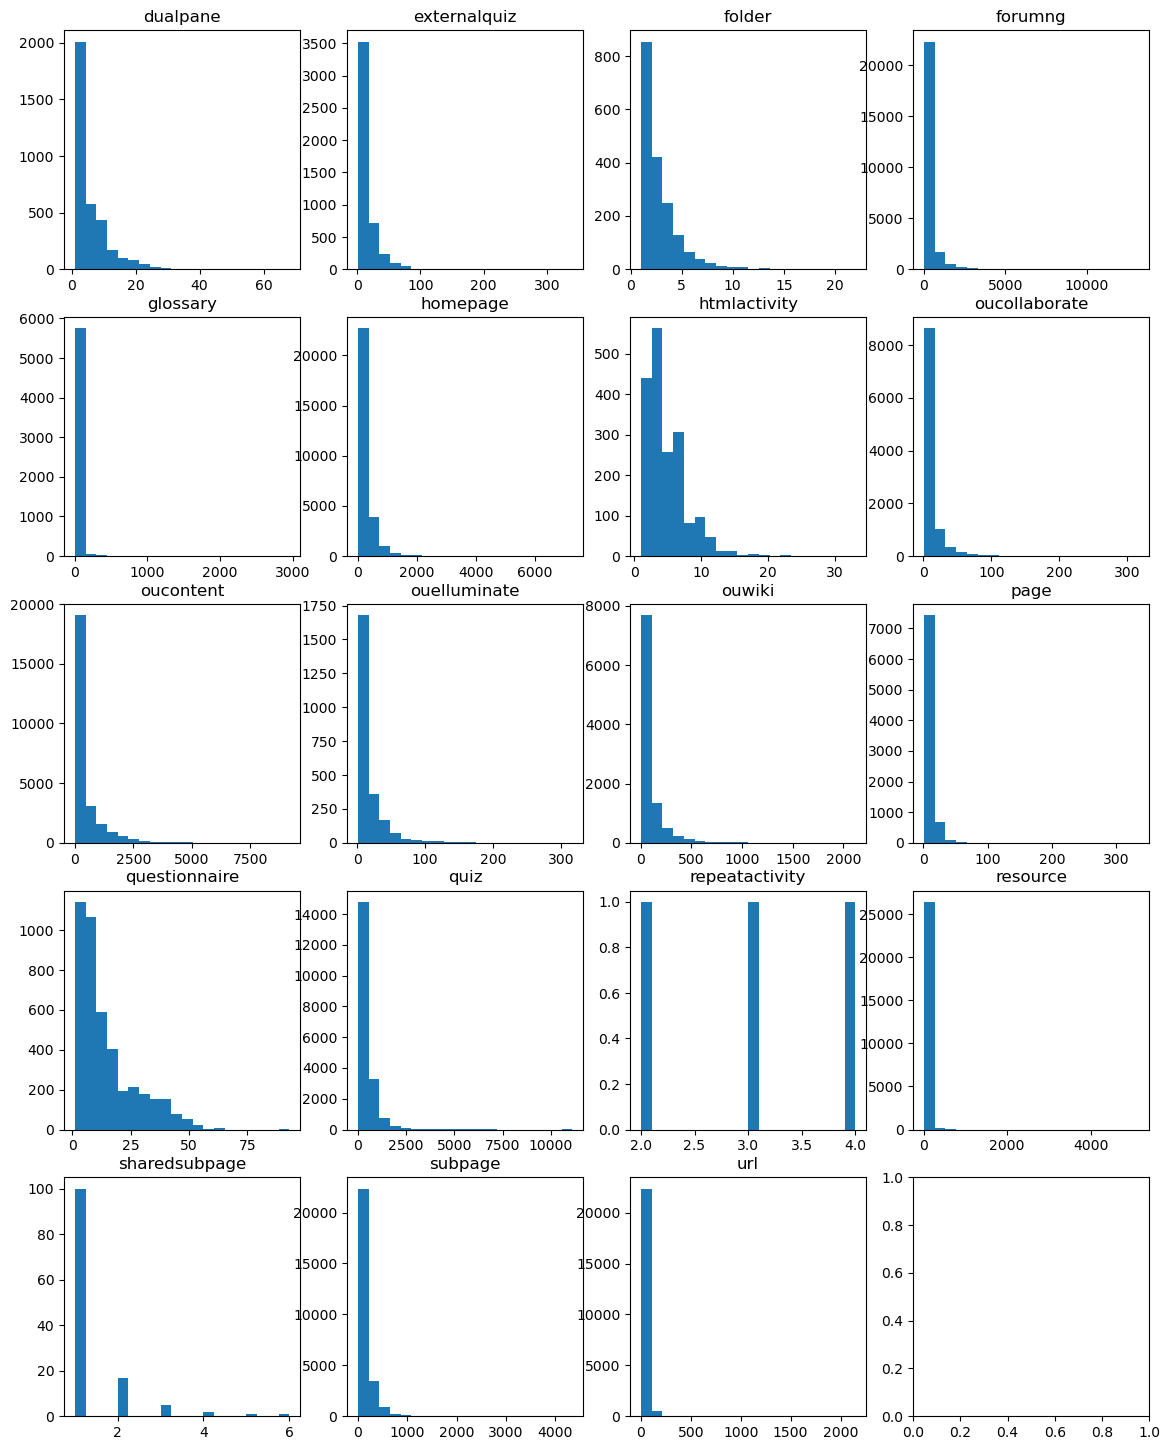

In [ ]:
fig, axs = plt.subplots(nrows=5,ncols=4, figsize=(14,18))

for idx, feature in enumerate(dfc[interact_feats]): 
    y, x = idx//4, idx%4
    z = dfc[feature]
    axs[y, x].hist(z[z > 0], bins=20)
    axs[y, x].set_title(feature)

In [ ]:
n = len(dfc)
print("Feature / # students / % of students with no instances")
for feature in interact_feats:
    z = dfc[feature]
    students_wo_feature = len(z[z==0])
    print(feature, "/", students_wo_feature, "/", students_wo_feature/n)

Feature / # students / % of students with no instances
dualpane / 24707 / 0.876943281039256
externalquiz / 23541 / 0.8355576063036843
folder / 26360 / 0.9356143962518634
forumng / 3169 / 0.11247959111237311
glossary / 22352 / 0.7933555760630369
homepage / 42 / 0.0014907361397032725
htmlactivity / 26344 / 0.9350464967700717
oucollaborate / 17869 / 0.6342372400085184
oucontent / 2271 / 0.08060623269681266
ouelluminate / 25813 / 0.9161993327181089
ouwiki / 18127 / 0.64339461915241
page / 19964 / 0.7085965784056222
questionnaire / 23910 / 0.8486547881025058
quiz / 8929 / 0.3169234045573933
repeatactivity / 28171 / 0.999893518847164
resource / 1611 / 0.057180379072904096
sharedsubpage / 28048 / 0.9955277915808902
subpage / 1003 / 0.035600198764818625
url / 5266 / 0.1869099169447008


We next try to draw histograms of these colored by `final_result`.

(array([2.764e+03, 5.800e+01, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.,  210.,  420.,  630.,  840., 1050., 1260., 1470., 1680.,
        1890., 2100.]),
 <BarContainer object of 10 artists>)

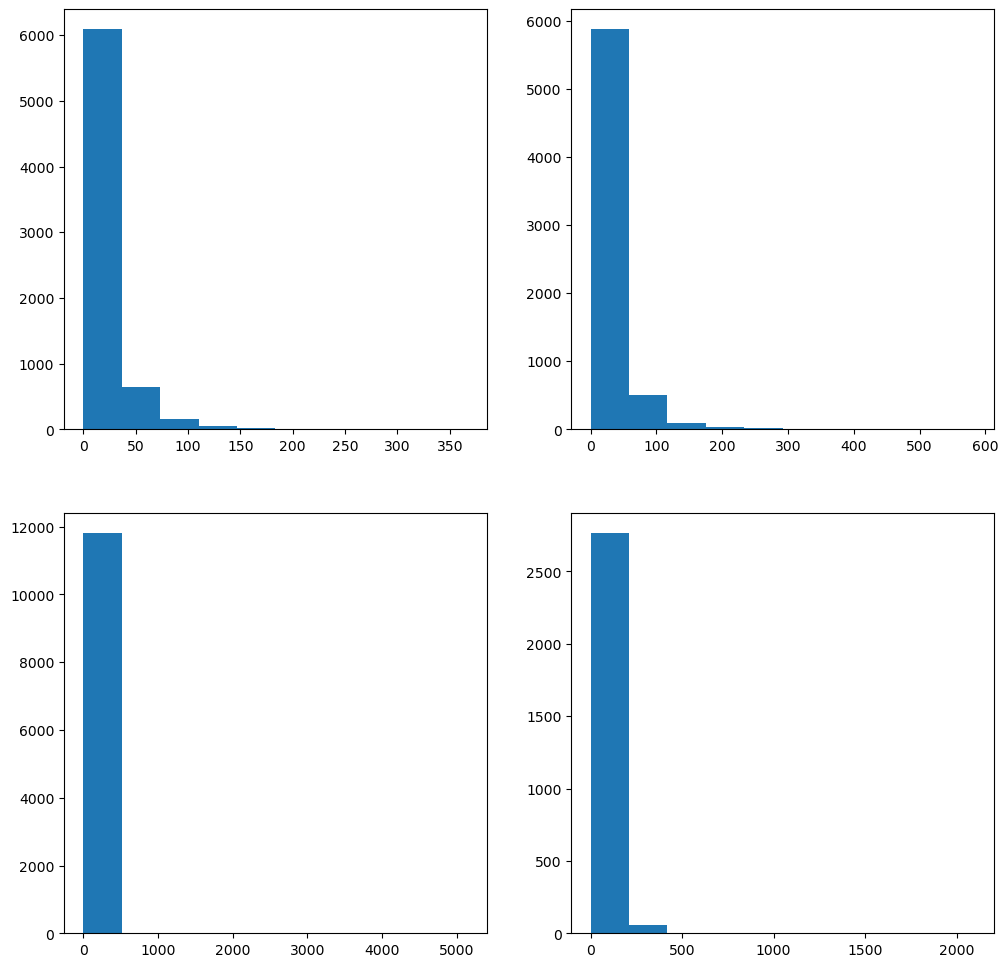

In [ ]:
# currently a proof of concept
#sns.histplot(data=dfc, x='resource', hue='final_result')
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(12,12))

axs[0,0].hist(dfc[dfc.final_result==0.0]['resource'])
axs[0,1].hist(dfc[dfc.final_result==1.0]['resource'])
axs[1,0].hist(dfc[dfc.final_result==2.0]['resource'])
axs[1,1].hist(dfc[dfc.final_result==3.0]['resource'])


This might be skewed by a small number of extreme outliers, so let's see what happens when we remove these ...

In [ ]:
dfc[dfc.final_result==0.0].resource.describe()

count    6985.000000
mean       17.449105
std        25.962961
min         0.000000
25%         2.000000
50%         9.000000
75%        22.000000
max       367.000000
Name: resource, dtype: float64

In [ ]:
z = dfc[dfc.final_result==0.0].resource
len(z[z<=z.quantile(.98)])

6847

Text(0.5, 1.0, 'Distinction')

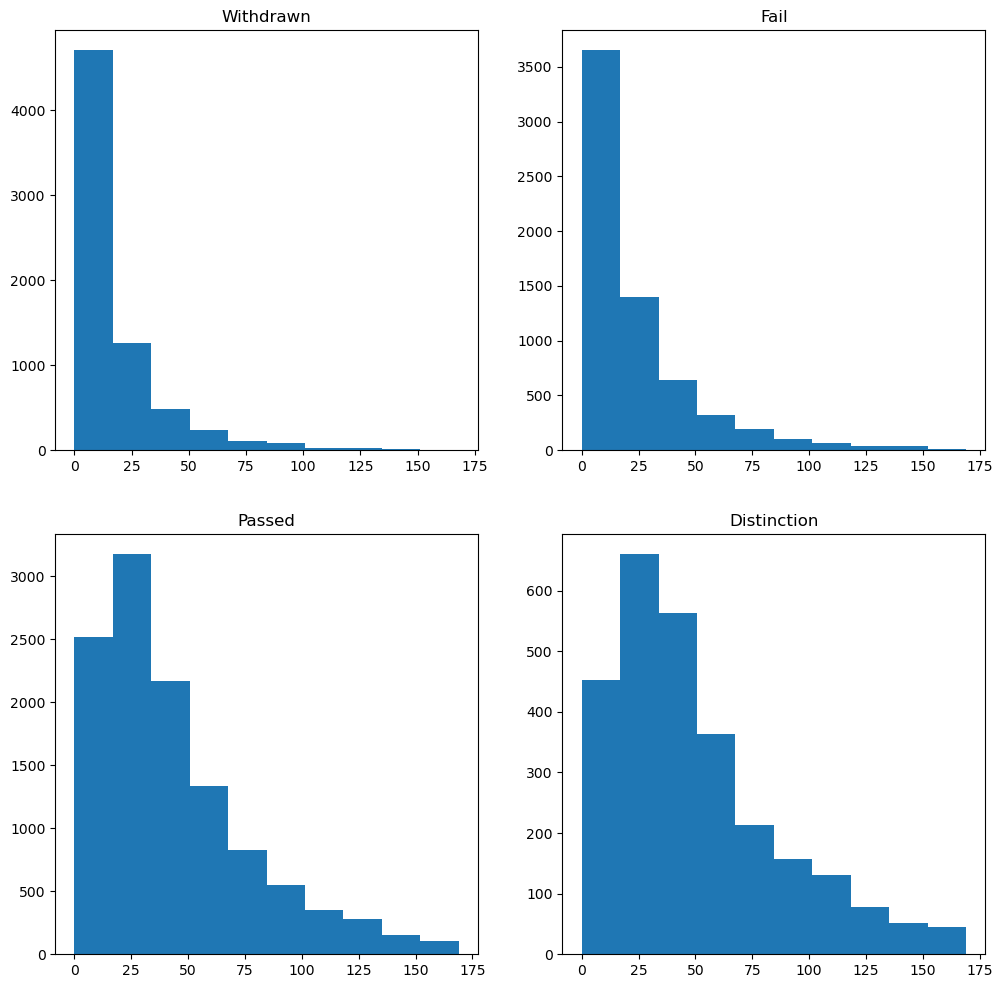

In [ ]:
#sns.histplot(data=dfc[dfc.resource<=dfc.resource.quantile(.95)], x='resource', hue='final_result', bins=10)
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(12,12))

z = dfc[dfc.resource <= dfc.resource.quantile(.98)]

axs[0,0].hist(z[z.final_result==0.0]['resource'])
axs[0,0].set_title('Withdrawn')
axs[0,1].hist(z[z.final_result==1.0]['resource'])
axs[0,1].set_title('Fail')
axs[1,0].hist(z[z.final_result==2.0]['resource'])
axs[1,0].set_title('Passed')
axs[1,1].hist(z[z.final_result==3.0]['resource'])
axs[1,1].set_title('Distinction')


Text(0.5, 1.0, 'Distinction')

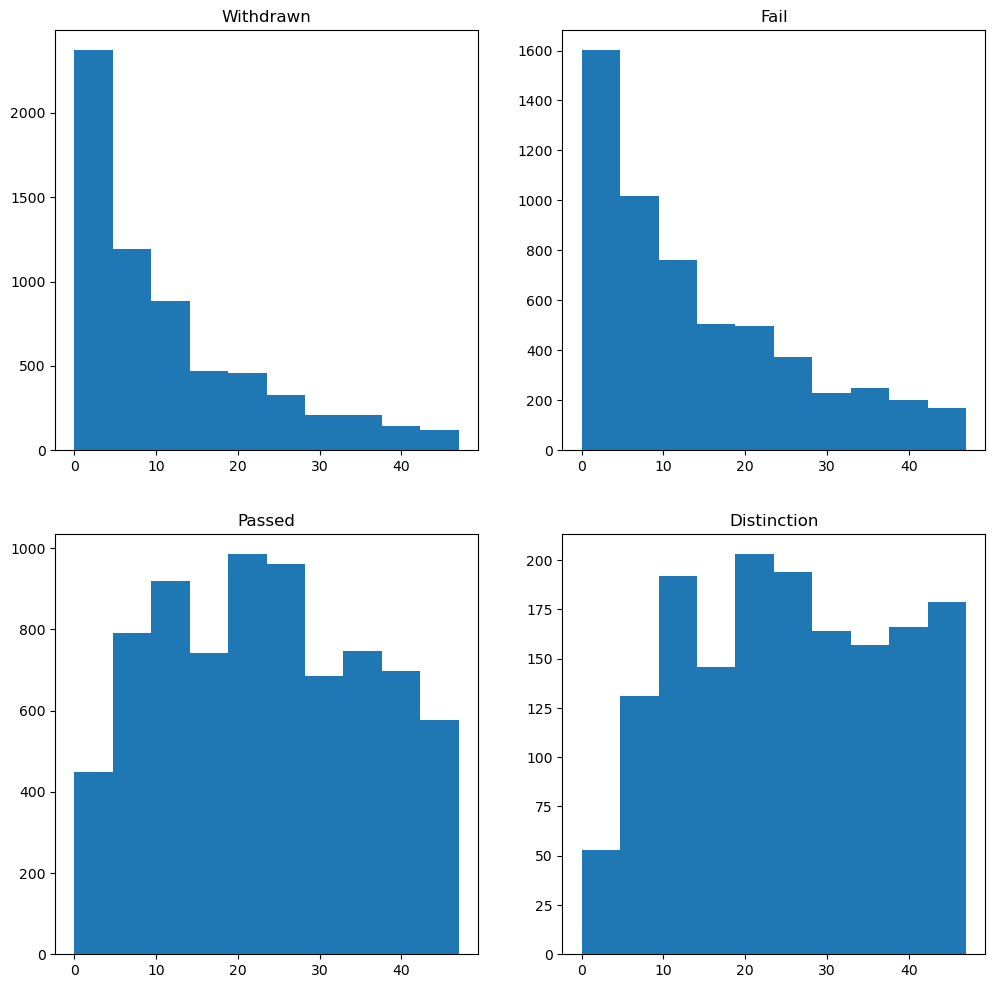

In [ ]:
#sns.histplot(data=dfc[dfc.resource<=dfc.resource.quantile(.95)], x='resource', hue='final_result', bins=10)
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(12,12))

z = dfc[dfc.resource <= dfc.resource.quantile(.75)]

axs[0,0].hist(z[z.final_result==0.0]['resource'])
axs[0,0].set_title('Withdrawn')
axs[0,1].hist(z[z.final_result==1.0]['resource'])
axs[0,1].set_title('Fail')
axs[1,0].hist(z[z.final_result==2.0]['resource'])
axs[1,0].set_title('Passed')
axs[1,1].hist(z[z.final_result==3.0]['resource'])
axs[1,1].set_title('Distinction')


By disregarding outliers, a trend becomes clear ... and it's not clear what's happening among those outliers.

In [ ]:
sns.histplot(data=dfc[dfc.resource>=dfc.resource.quantile(.75)], x='resource', hue='final_result', bins=50)


Let's repeat the outlier-excluded histograms for three other interaction features with relatively little missing data, `subpage`, `forumng`, and `oucontent`.

Text(0.5, 1.0, 'Distinction')

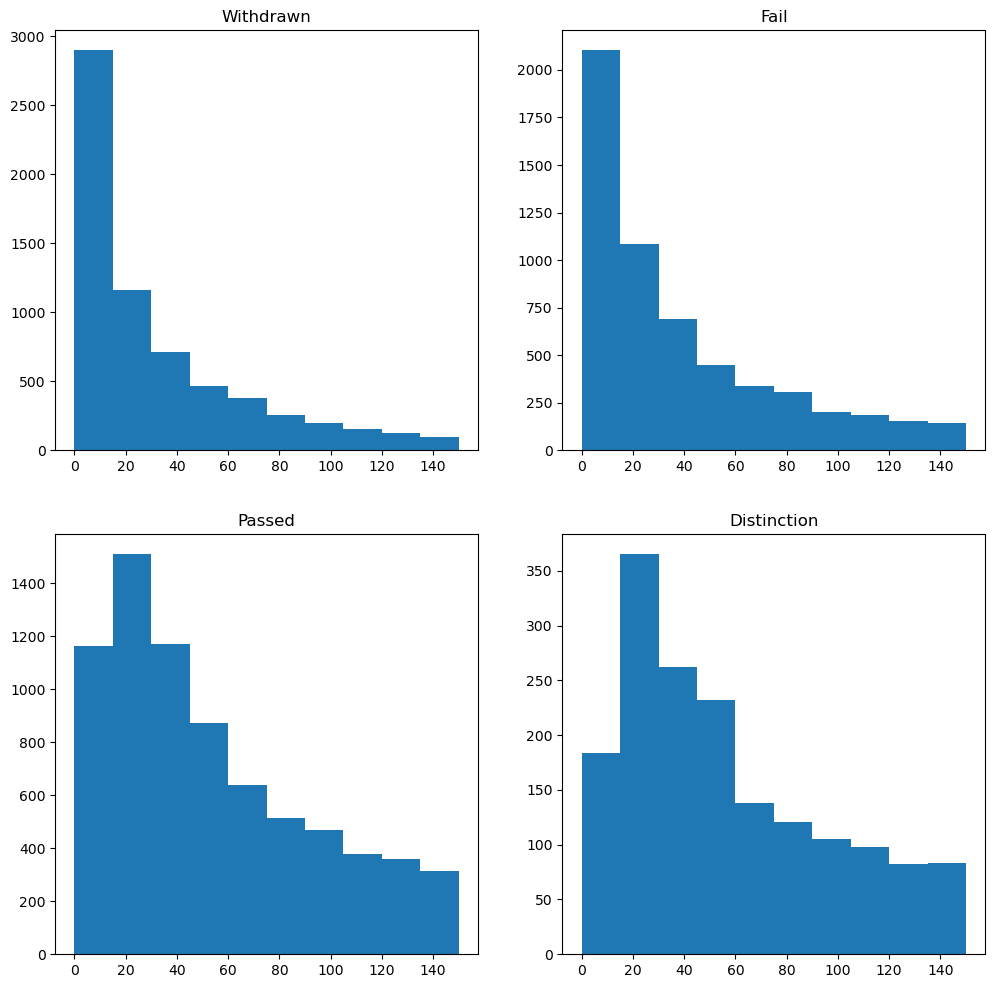

In [115]:
#sns.histplot(data=dfc[dfc.resource<=dfc.resource.quantile(.95)], x='resource', hue='final_result', bins=10)
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(12,12))

z = dfc[dfc.subpage <= dfc.subpage.quantile(.75)]

axs[0,0].hist(z[z.final_result==0.0]['subpage'])
axs[0,0].set_title('Withdrawn')
axs[0,1].hist(z[z.final_result==1.0]['subpage'])
axs[0,1].set_title('Fail')
axs[1,0].hist(z[z.final_result==2.0]['subpage'])
axs[1,0].set_title('Passed')
axs[1,1].hist(z[z.final_result==3.0]['subpage'])
axs[1,1].set_title('Distinction')

Text(0.5, 1.0, 'Distinction')

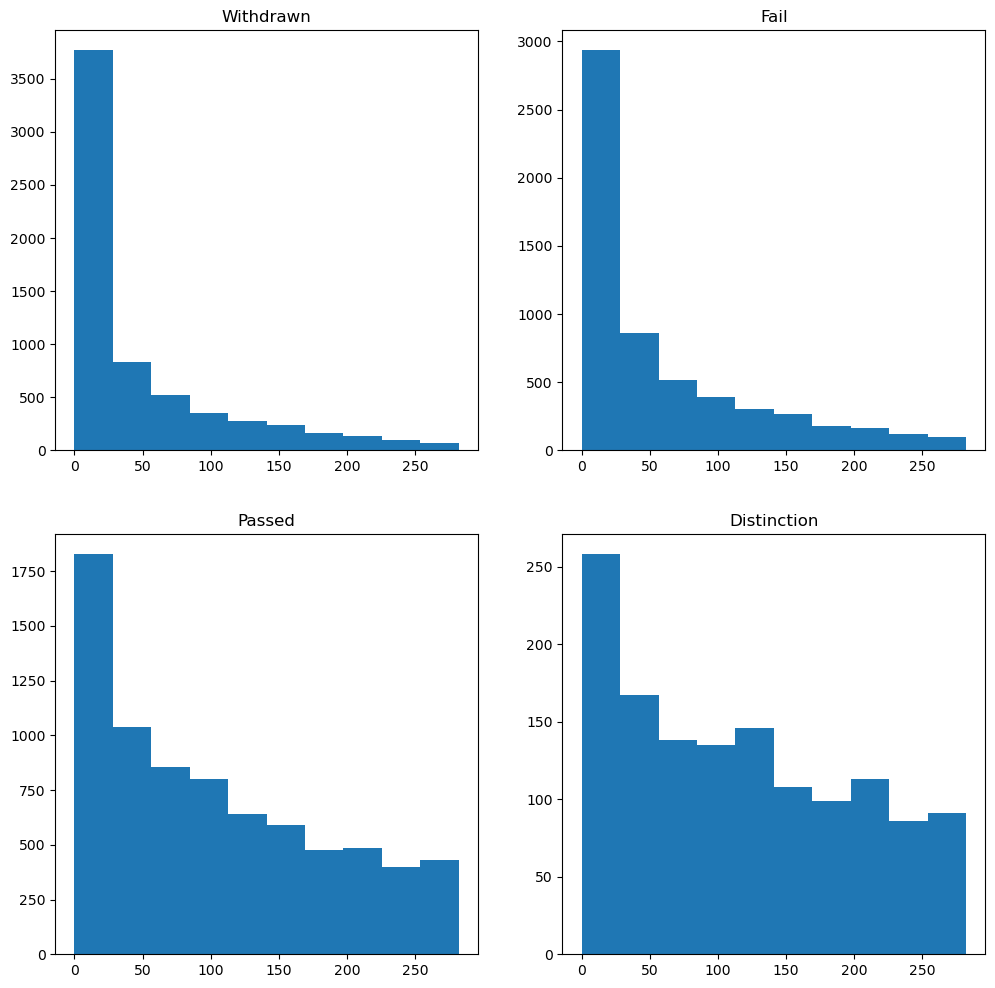

In [116]:
#sns.histplot(data=dfc[dfc.resource<=dfc.resource.quantile(.95)], x='resource', hue='final_result', bins=10)
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(12,12))

z = dfc[dfc.forumng <= dfc.forumng.quantile(.75)]

axs[0,0].hist(z[z.final_result==0.0]['forumng'])
axs[0,0].set_title('Withdrawn')
axs[0,1].hist(z[z.final_result==1.0]['forumng'])
axs[0,1].set_title('Fail')
axs[1,0].hist(z[z.final_result==2.0]['forumng'])
axs[1,0].set_title('Passed')
axs[1,1].hist(z[z.final_result==3.0]['forumng'])
axs[1,1].set_title('Distinction')

Text(0.5, 1.0, 'Distinction')

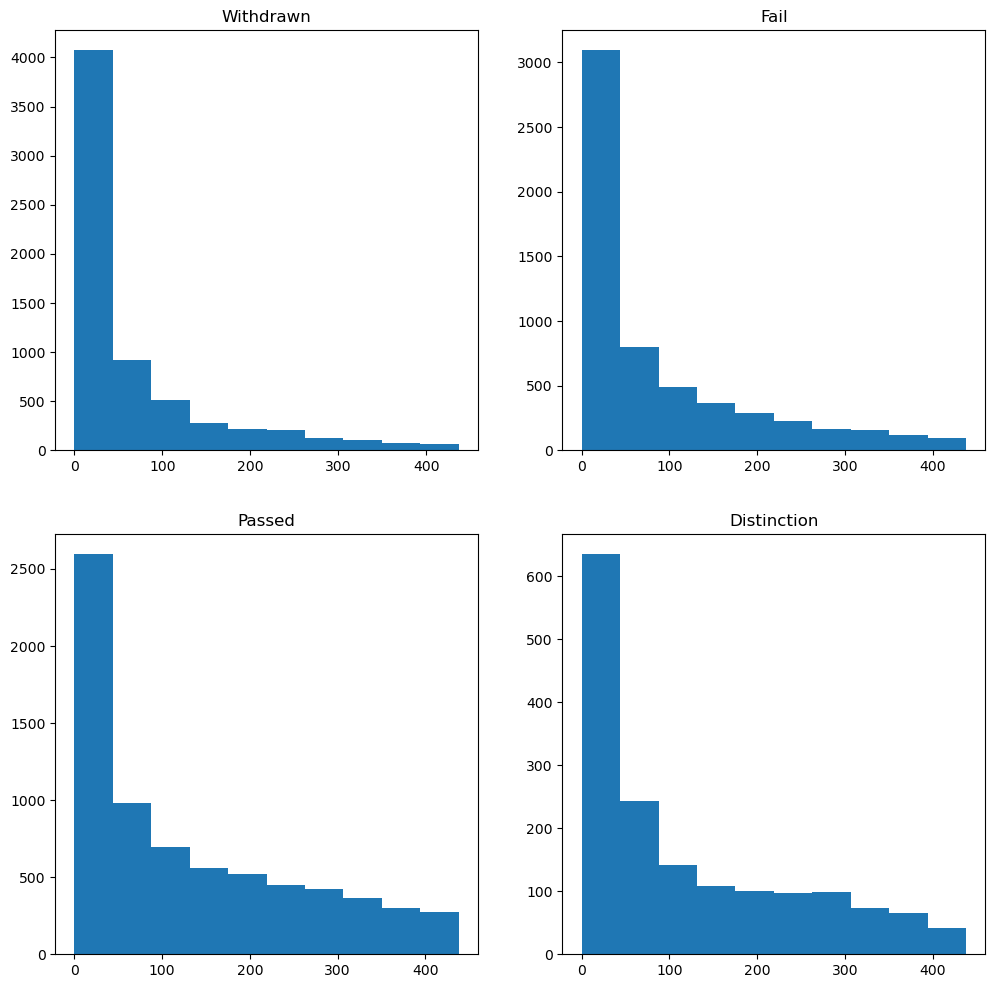

In [117]:
#sns.histplot(data=dfc[dfc.resource<=dfc.resource.quantile(.95)], x='resource', hue='final_result', bins=10)
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(12,12))

z = dfc[dfc.oucontent <= dfc.oucontent.quantile(.75)]

axs[0,0].hist(z[z.final_result==0.0]['oucontent'])
axs[0,0].set_title('Withdrawn')
axs[0,1].hist(z[z.final_result==1.0]['oucontent'])
axs[0,1].set_title('Fail')
axs[1,0].hist(z[z.final_result==2.0]['oucontent'])
axs[1,0].set_title('Passed')
axs[1,1].hist(z[z.final_result==3.0]['oucontent'])
axs[1,1].set_title('Distinction')

Doing a similar thing with outliers (just for visual clarity, for now), we plot the distribution of interaction features for the separate module-presentations.

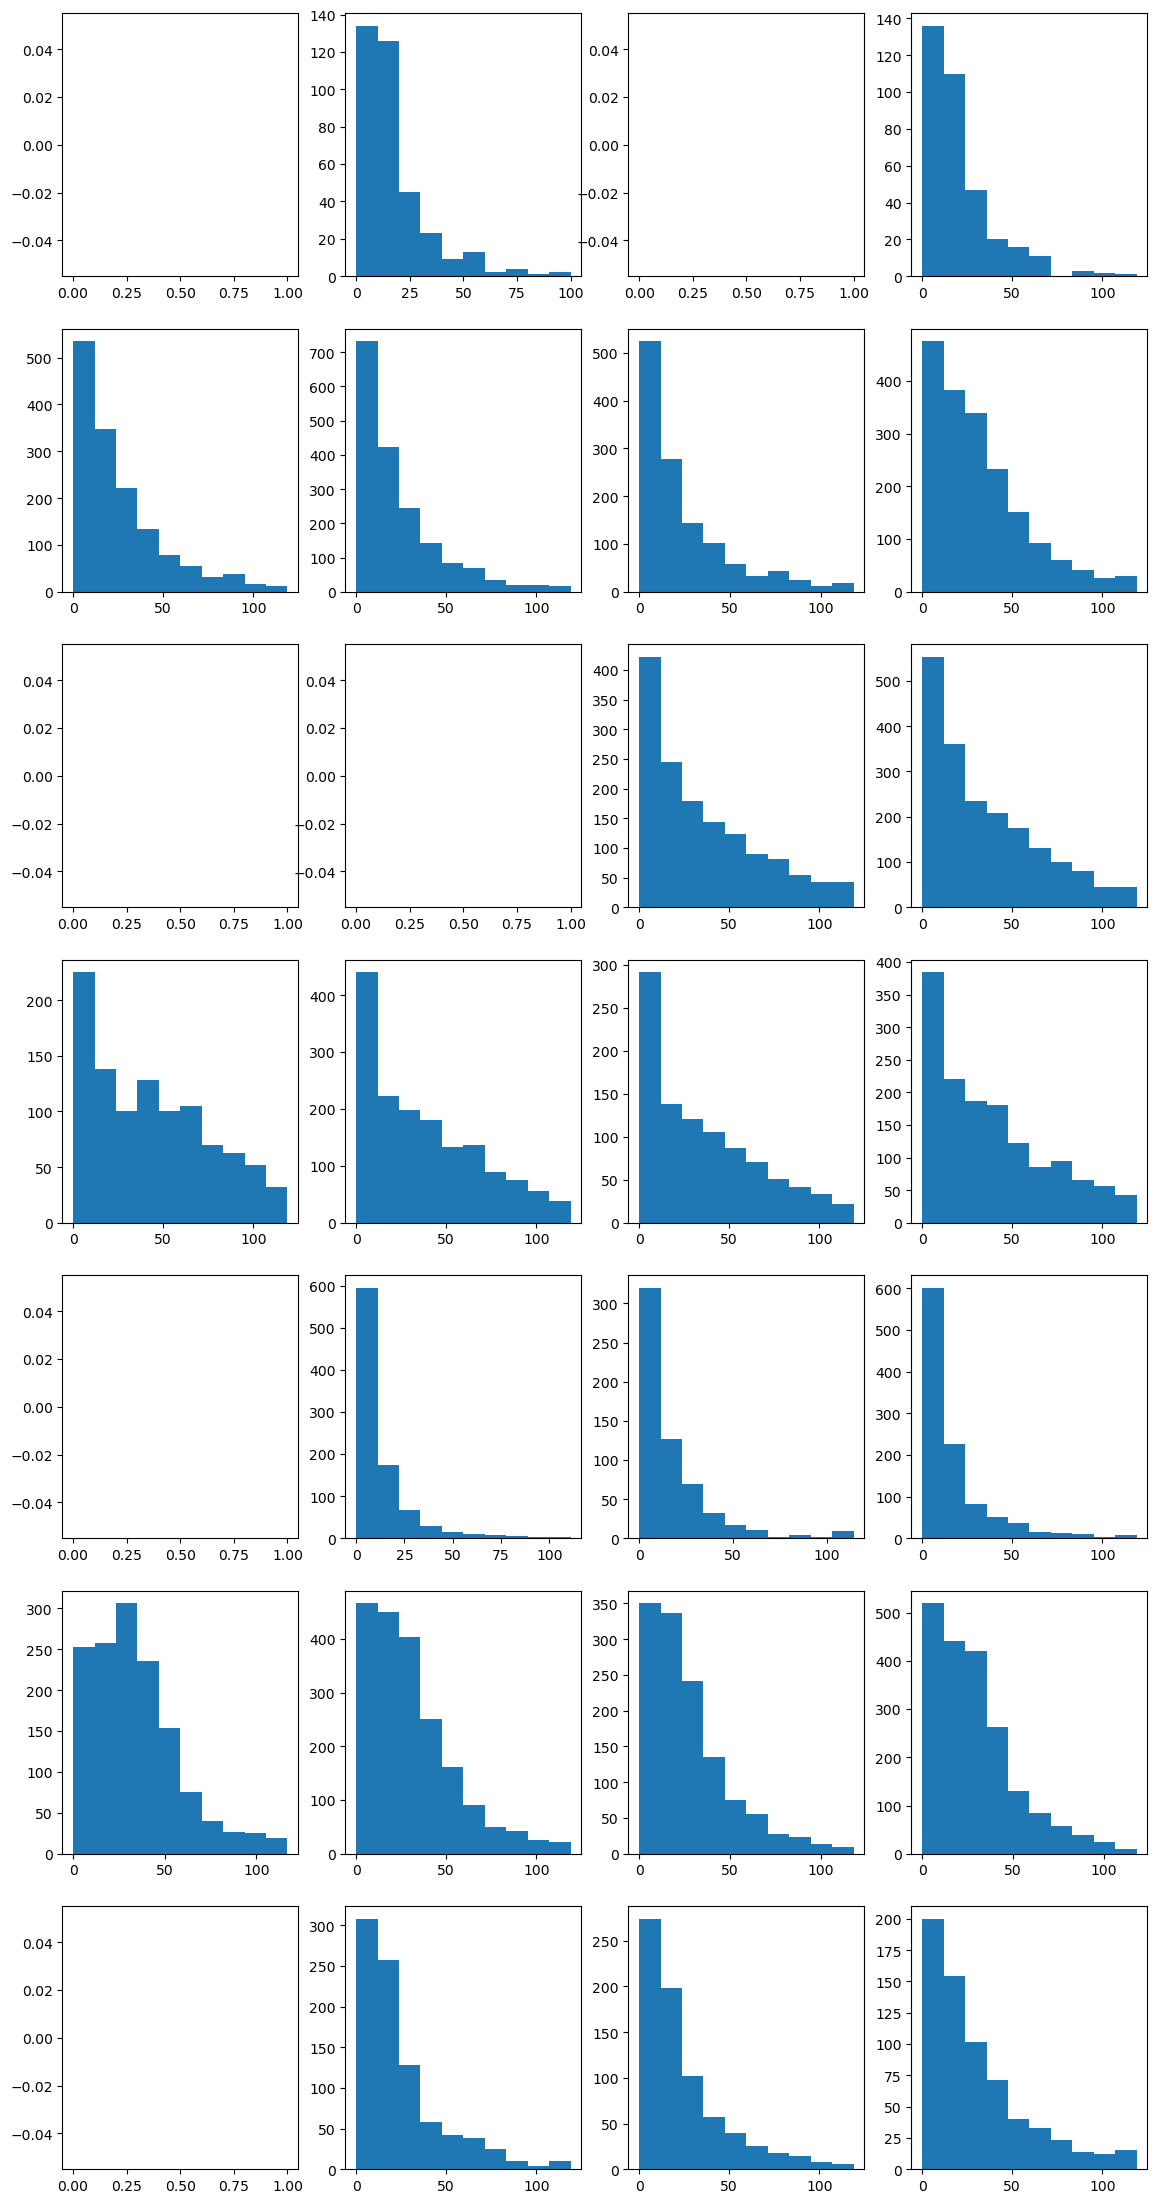

In [112]:
fig, axs = plt.subplots(nrows=7,ncols=4, figsize=(14,28))

z = pd.concat([dfc.index.to_frame(),dfc],axis=1)
z = z[z.resource <= z.resource.quantile(.95)]
for x in range(4):
   for y in range(7):
#        print(len(z[(z.code_module==y)&(z.code_presentation==x)]))
        axs[y,x].hist(z[(z.code_module==y)&(z.code_presentation==x)]['resource'])

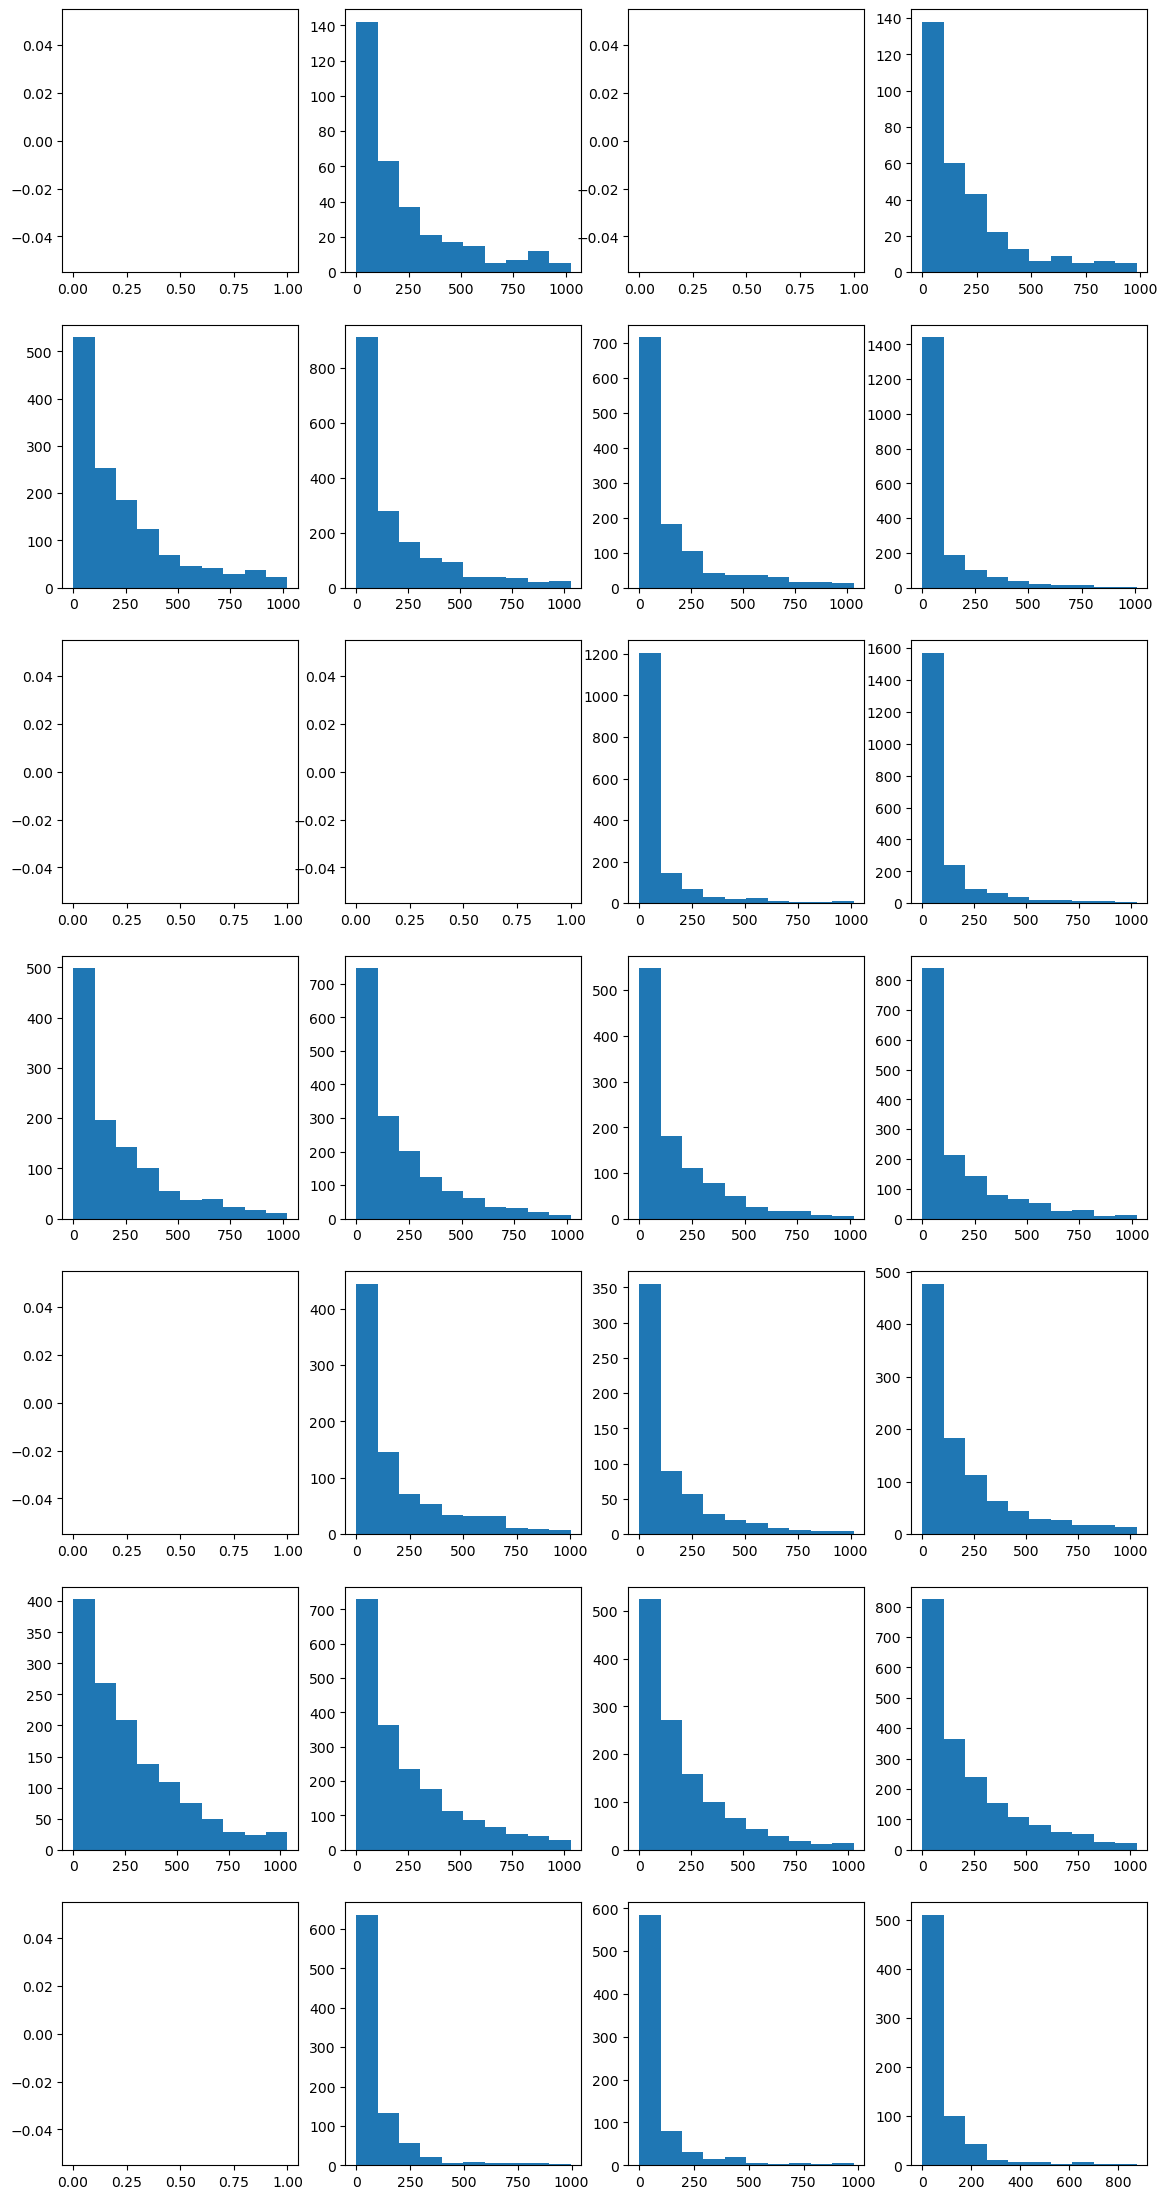

In [113]:
fig, axs = plt.subplots(nrows=7,ncols=4, figsize=(14,28))

z = pd.concat([dfc.index.to_frame(),dfc],axis=1)
z = z[z.forumng <= z.forumng.quantile(.95)]
for x in range(4):
   for y in range(7):
        axs[y,x].hist(z[(z.code_module==y)&(z.code_presentation==x)]['forumng'])

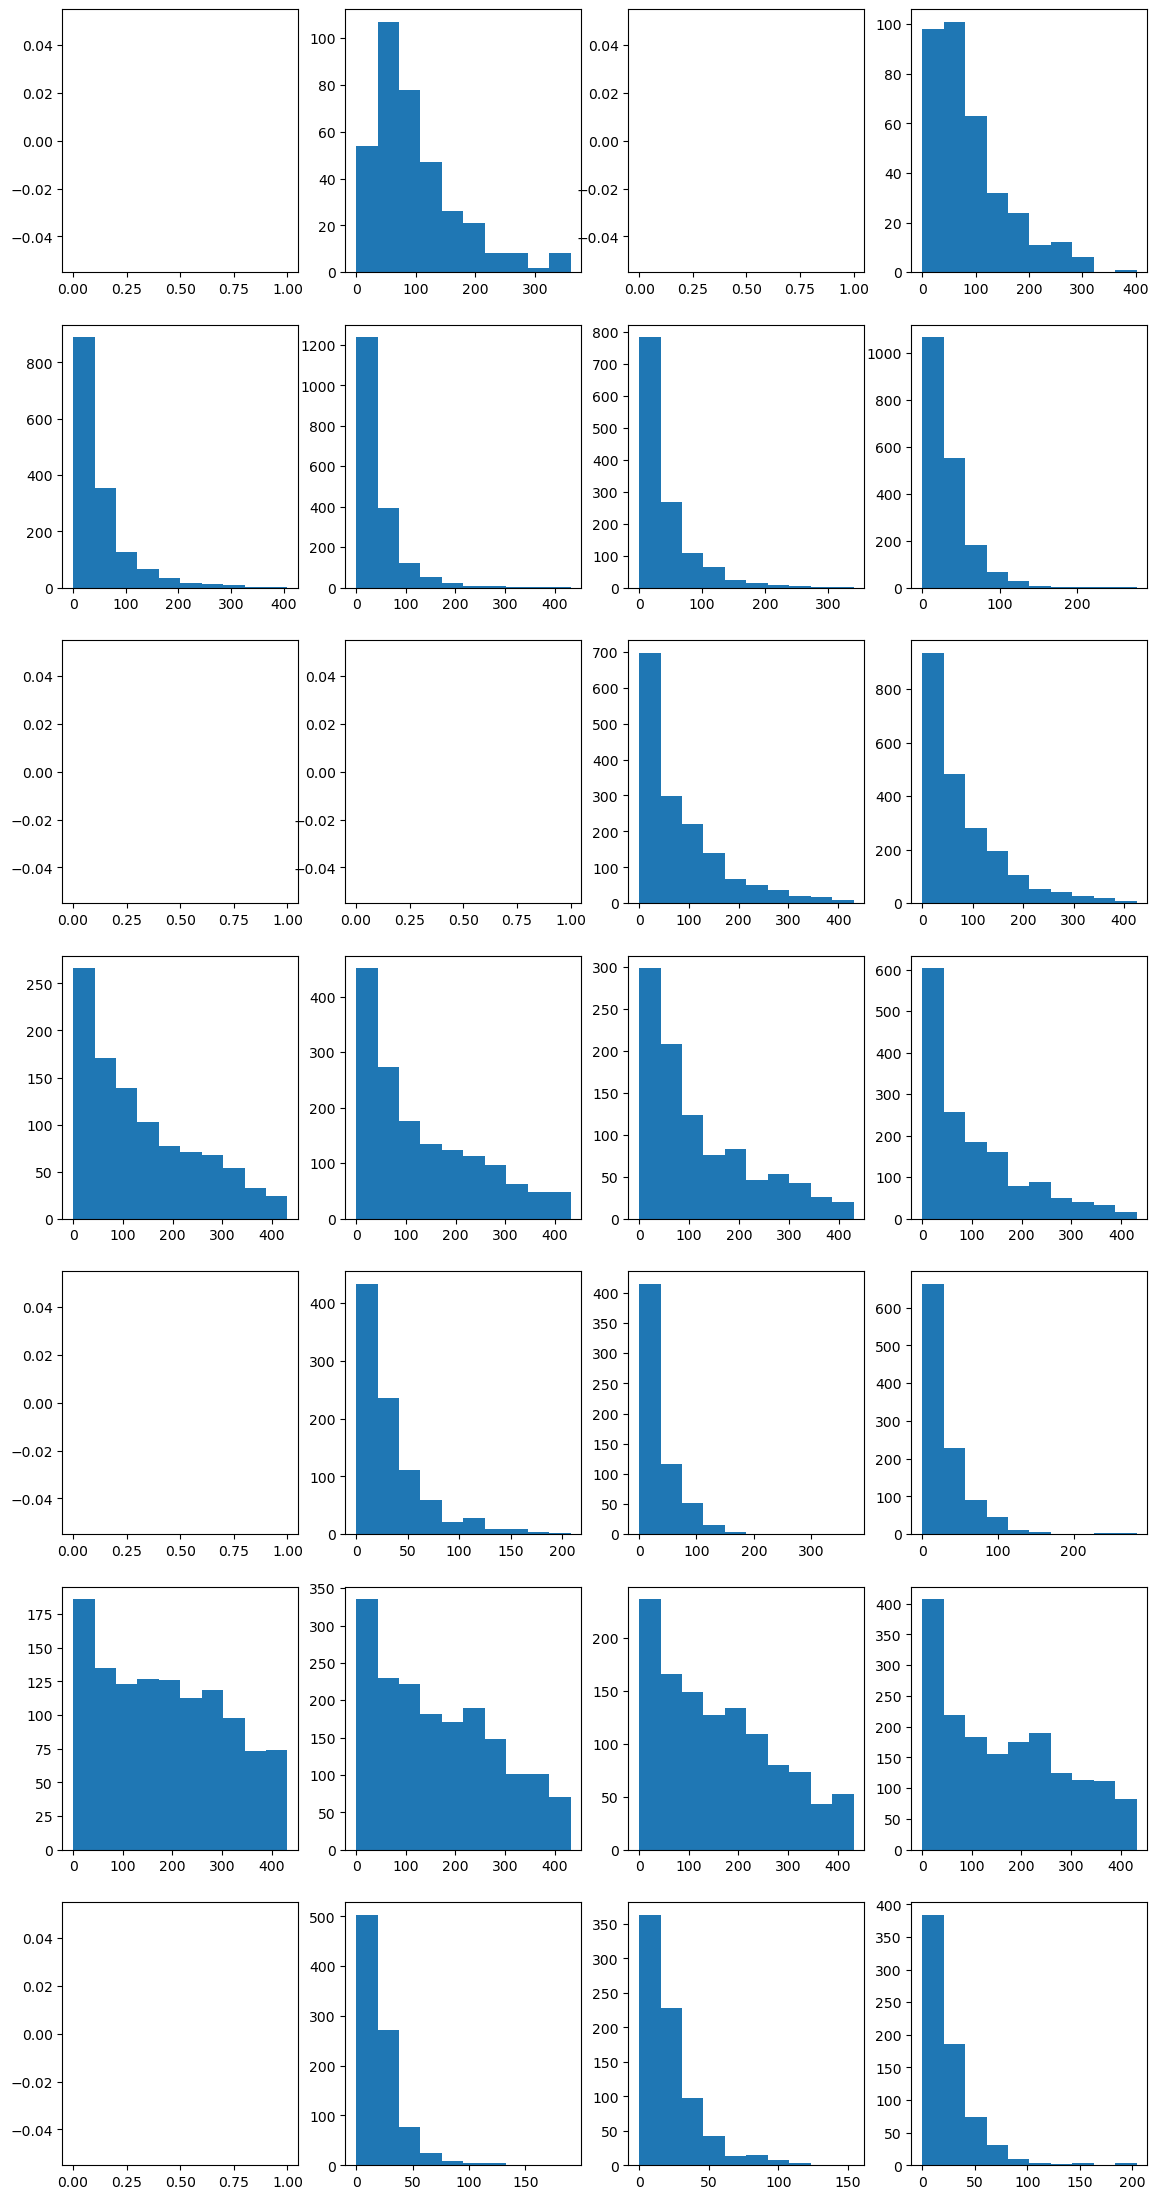

In [114]:
fig, axs = plt.subplots(nrows=7,ncols=4, figsize=(14,28))

z = pd.concat([dfc.index.to_frame(),dfc],axis=1)
z = z[z.subpage <= z.subpage.quantile(.95)]
for x in range(4):
   for y in range(7):
        axs[y,x].hist(z[(z.code_module==y)&(z.code_presentation==x)]['subpage'])

There are some differences between modules, but generally (for these 3 features, at least), the distributions seem pretty consistent across module-presentations.

**Jointly using interaction and student features**

We next attempt to look at a pair of features and visualize how much that might explain differences in outcome.

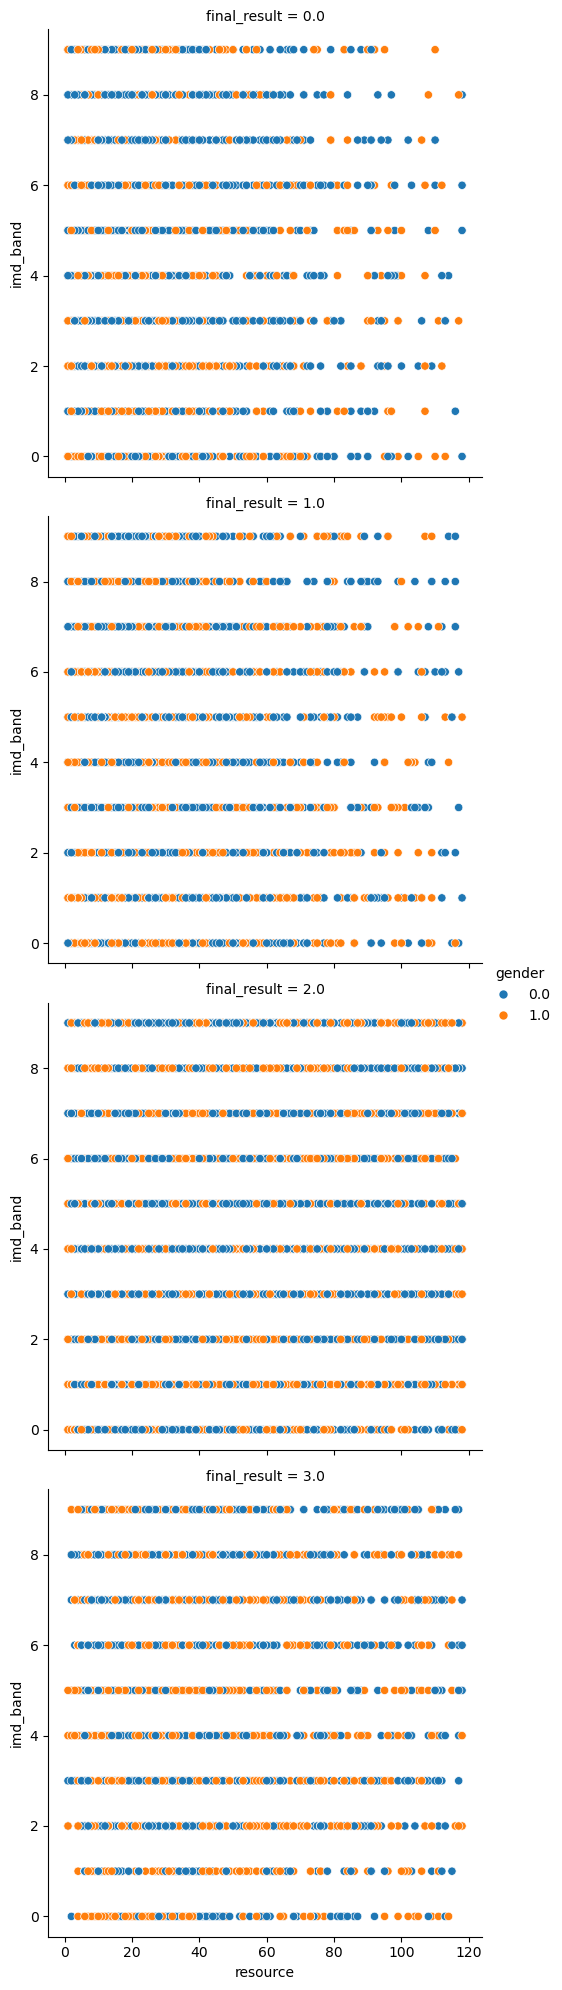

In [138]:
sns.relplot(dfc[(dfc.resource>dfc.resource.quantile(.05))&
            (dfc.resource<dfc.resource.quantile(.95))],
            x="resource",
            y="imd_band",
            hue="gender",
            #col="age_band",
            row="final_result")

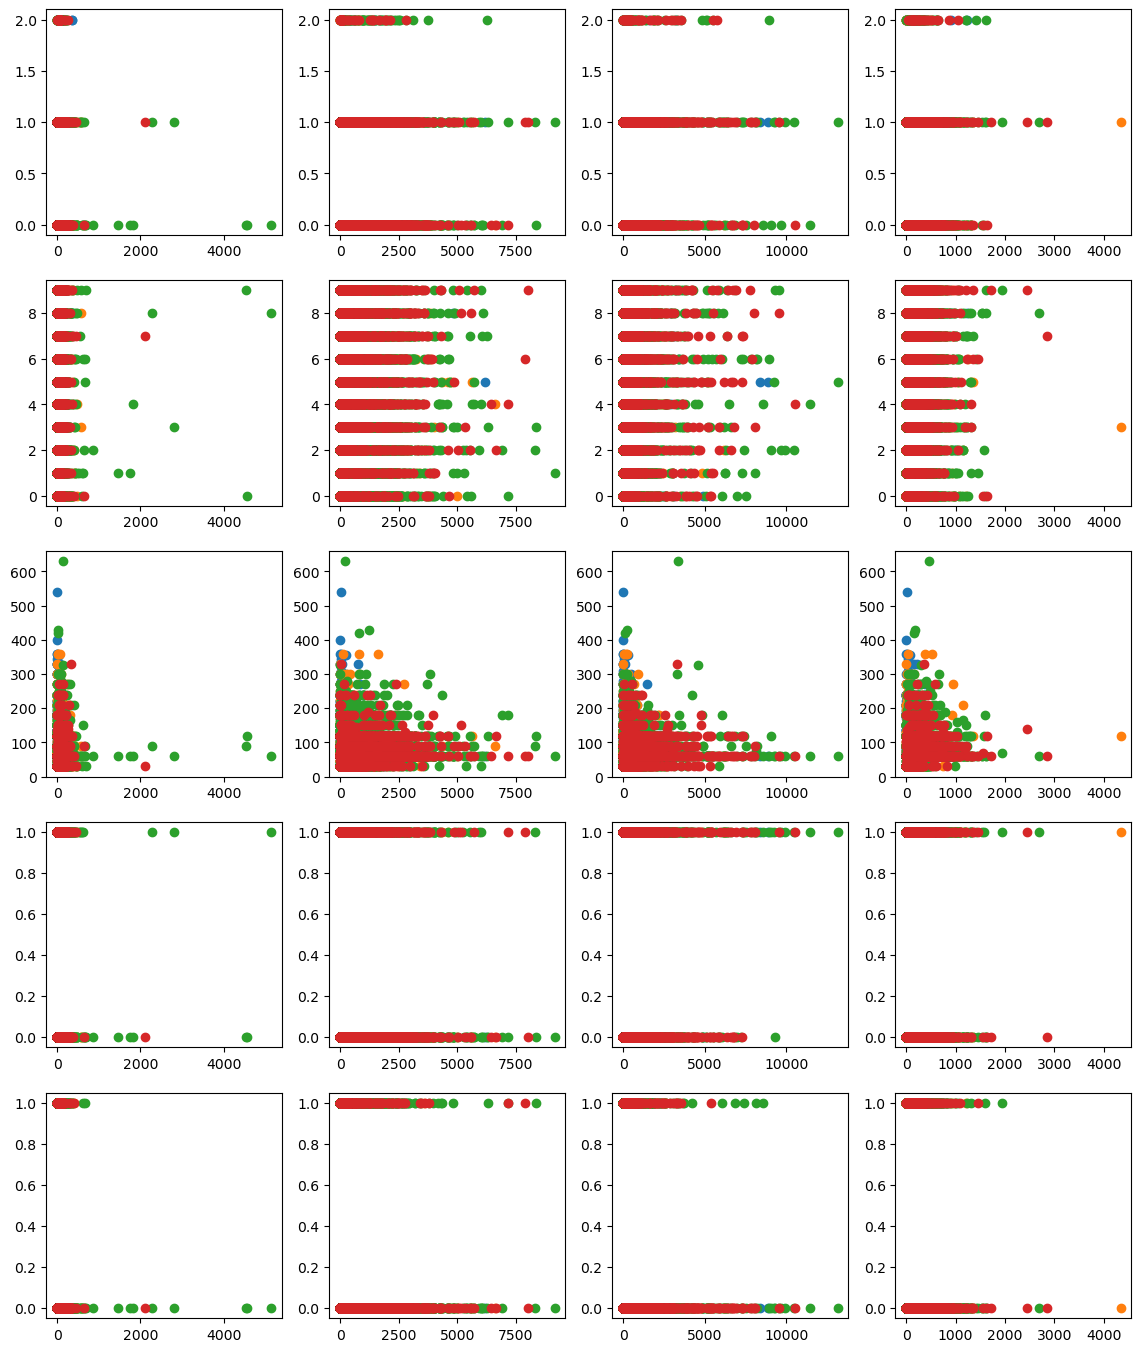

In [139]:
fig, axs = plt.subplots(nrows=5,ncols=4, figsize=(14,17))

top_interact_feats = ['resource','oucontent','forumng','subpage']
top_student_feats = ['age_band','imd_band','studied_credits','gender','disability']

for idx, ifeat in enumerate(top_interact_feats):
    for idy, sfeat in enumerate(top_student_feats):
        #sns.relplot(dfc,x=ifeat,y=sfeat,hue="final_result")
        for x in range(4):
            z = dfc[dfc.final_result==x]
            axs[idy,idx].scatter(z[ifeat],z[sfeat])                     

Okay nothing jumps out to me when I glance at these.

**What is `date`?**

Streaming OULAD paper (Casolini et al.) say that this is "the date of student’s interaction with the VLE measured as the number of days since the start of the module presentation". 

0 -18 240
1 219 510
2 347 606
3 582 876


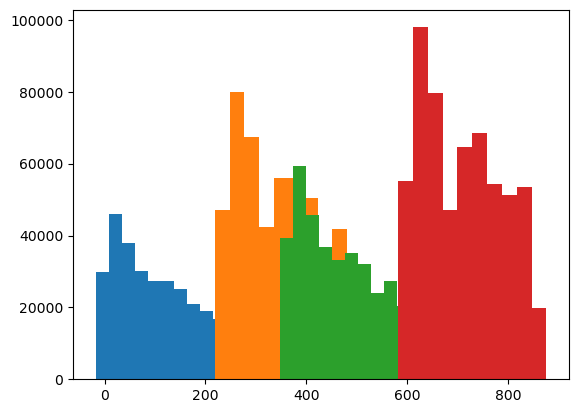

In [25]:
plt.hist(df[df.code_presentation==0.0].date)
plt.hist(df[df.code_presentation==1.0].date)
plt.hist(df[df.code_presentation==2.0].date)
plt.hist(df[df.code_presentation==3.0].date)
for x in range(4):
    z = df[df.code_presentation==x].date
    print(x,z.min(),z.max())


That does not actually seem accurate, the four presentations seem to correspond to distinct ranges of dates. It seems the date is, rather, measured by number of dates since a designated day near the start of presentation 0. This is consistent with what Casolini et al. say on page 4 of their paper, where they state that date 0 is the start date for the 2013B presentation. For our purposes it may be useful to change the dates back so that day 0 is start of the given presentation for each data point, but of presentation 0.

**How missing is `score`?**

In [ ]:
len(df), len(df.score[~df.score.isna()]), len(dfc)


(1718983, 115592, 28174)

Less than 10% of data rows have a non-empty `score` field, but there is more than one `score` field per student. 

Hypothesis: only data rows involving quiz or assessment interactions have a `score` field.

In [37]:
df[~df.score.isna()][interact_feats+['score']]

,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,score
7,0,0,0,35,0,8,0,0,4,0,0,0,0,0,0,1,0,1,0,78.0
16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,85.0
55,0,0,0,0,0,4,0,0,9,0,0,0,0,0,0,0,0,3,3,70.0
64,0,0,0,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,68.0
86,0,0,0,15,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718886,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,8,0,0,0,80.0
1718894,0,0,0,0,0,12,0,0,26,0,0,0,0,0,0,2,0,6,0,72.0
1718918,0,0,0,0,0,3,0,0,0,0,0,0,0,2,0,0,0,2,0,75.0
1718928,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,70.0


Okay maybe there are no assessment interaction types (or interaction types that are definitely assessment and not anything else) besides `quiz` and `externalquiz`, and it appears there are rows with a non-empty score with no `quiz` or `externalquiz` interactions.

New hypothesis: the `score` field is only populated after a certain point in the presentation (when assessment is done and a score is given), all data rows before that point have an empty `score` field. 

All data rows, dates 232 to 510
`score` data rows, dates 241 to 480


(array([282.,  33., 270.,   5., 206.,  46., 162.,  84.,  84., 135.]),
 array([241. , 264.9, 288.8, 312.7, 336.6, 360.5, 384.4, 408.3, 432.2,
        456.1, 480. ]),
 <BarContainer object of 10 artists>)

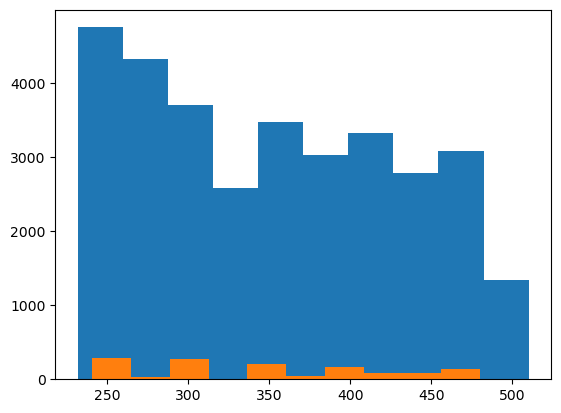

In [46]:
df_omp = df[(df.code_module==0.0) & (df.code_presentation==1.0)]
len(df_omp), len(df_omp[~df_omp.score.isna()])

print("All data rows, dates", df_omp.date.min(), "to", df_omp.date.max())
print("`score` data rows, dates", df_omp[~df_omp.score.isna()].date.min(), 
      "to", df_omp[~df_omp.score.isna()].date.max())

plt.hist(df_omp.date)
plt.hist(df_omp[~df_omp.score.isna()].date)

No, that's not [entirely] it either. Maybe it's this: some students receive scores at some point in the module-presentation; for these students, all data rows for that module-presentation after a certain point have non-empty `score`. Other students never receive a `score` for the module-presentation (because they do not do the assessment, or for some other reason); for these students, all data rows have an empty `score`.

To verify this: check that for students who do have a `score` at some point, all rows without a empty `score` precede all rows with a non-empty `score`.

In [50]:
students_omp = set(df_omp.id_student)
students_with_scores = set(df_omp[~df_omp.score.isna()].id_student)
students_wo_scores = students_omp.difference(students_with_scores)
len(students_with_scores),len(students_wo_scores), len(students_omp)

(343, 20, 363)

In [78]:
df_omp_scores = df_omp[df_omp.id_student.isin(students_with_scores)]
maxdate = df_omp.date.max() 

len(df_omp_scores[df_omp_scores.date==maxdate])
#print (df_omp.date.max(),
#       df_omp_scores[df_omp_scores.score.isna()].date.max(),
#       df_omp_scores[~df_omp_scores.score.isna()].date.min())


42

In [79]:
df_omp_scores[df_omp_scores.date==maxdate][['id_student','date','score']].sample(3)


,id_student,date,score
31852,2689958,510,NaN
18784,958987,510,NaN
16031,405088,510,NaN


In [80]:
df_omp_scores[(df_omp_scores.id_student==405088)&(~df_omp_scores.score.isna())][['date','score']]

,date,score
15960,261,85.0
15975,296,72.0
15989,366,71.0
15996,408,72.0
16012,456,86.0


(array([14., 12.,  8.,  5.,  6.,  2.,  7., 12., 15.,  6.]),
 array([232. , 259.8, 287.6, 315.4, 343.2, 371. , 398.8, 426.6, 454.4,
        482.2, 510. ]),
 <BarContainer object of 10 artists>)

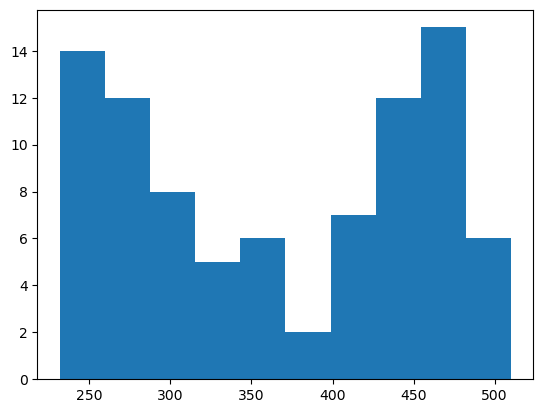

In [81]:
plt.hist(df_omp_scores[df_omp_scores.id_student==405088].date)

In [84]:
df_omp_scores[(df_omp_scores.id_student==405088)&(~df_omp_scores.score.isna())][interact_feats]

,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
15960,0,0,0,0,0,2,0,0,8,0,0,0,0,0,0,0,0,1,0
15975,0,0,0,27,0,8,0,0,3,0,0,0,0,0,0,0,0,0,0
15989,0,0,0,10,0,15,0,0,19,0,0,0,0,0,0,0,0,4,3
15996,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,6,3
16012,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Yeah, I can't tell from the data alone what's happening with the `score` field.